Tratando de construir un Método de Newton N-Dimensional genérico.

Funciona para invertir funciones de una variable, por ejemplo, o para invertir mapas de $Rˆn$ en $R^n$.

In [38]:
using Plots
using LinearAlgebra

Aquí haremos el método de Newton para un número arbitrario de variables y lo usaremos
para encontrar inversas de transformaciones en el plano. 

In [118]:
function NR(f, Jf, x, par; tol_x=1e-7, tol_f=1e-8, max_iter::Int64=100)    
    Er_x = 1.
    Ef = 1.
    iter = 0
    tol_x = tol_x^2
    tol_f = tol_f^2
    while (Er_x > tol_x || Ef > tol_f)
        iter = iter + 1
        if iter == max_iter
            error("Máximo número de iteraciones superadas")
        end
        dx = Jf(x,par) \ f(x,par) 
        x = x - dx
        Er_x = (dx'*dx) / (x'*x)
        Ef = f(x,par)'*f(x,par)
        println("Er_x = $Er_x,      Ef = $Ef")
    end
    return (iter, x, f(x,par))
end

NR (generic function with 3 methods)

In [119]:
function T(x,v)
    return v .- x.^(1/3)
end
function JT(x,v)
    return Diagonal(-1/3 .*x.^(-2/3)
end

JT (generic function with 1 method)

In [126]:
N = 400
par = [i for i ∈ 1:N];
x0 = fill(1,N);
#T(x0,v)
JT(x0,v);

In [127]:
sol = NR(T,JT,x0,par)

Er_x = 0.9778061999098262,      Ef = 3.3521968144613875e14
Er_x = 0.24963800307226489,      Ef = 2.9417497074133758e13
Er_x = 0.2487900985064108,      Ef = 2.5790721241283076e12
Er_x = 0.24600508497952558,      Ef = 2.2537733407841138e11
Er_x = 0.23717613970303067,      Ef = 1.9480870662829117e10
Er_x = 0.21154185576771492,      Ef = 1.623394170094584e9
Er_x = 0.15169527845545072,      Ef = 1.1995642280988893e8
Er_x = 0.06509850203880904,      Ef = 6.0620278094960395e6
Er_x = 0.01046000031154883,      Ef = 100489.65000578985
Er_x = 0.0002882500059895198,      Ef = 93.2629781247053
Er_x = 2.8747814173378915e-7,      Ef = 0.0001523526545532552
Er_x = 4.572271144398454e-13,      Ef = 7.002347307102011e-16
Er_x = 2.0624989466292823e-24,      Ef = 4.654397669939753e-25


(13, [1.0, 1.2599210498948732, 1.4422495703074083, 1.5874010519681996, 1.709975946676697, 1.8171205928321397, 1.9129311827723892, 2.0, 2.080083823051904, 2.154434690031884  …  7.3123828115731655, 7.318611420045943, 7.324829444634315, 7.331036930185336, 7.337233921242781, 7.343420462049963, 7.349596596552507, 7.355762368401103, 7.361917820954216, 7.368062997280774], [0.0, 0.0, 0.0, -8.881784197001252e-16, -8.881784197001252e-16, 0.0, -8.881784197001252e-16, 0.0, 0.0, -1.7763568394002505e-15  …  -5.684341886080802e-14, 5.684341886080802e-14, 0.0, 0.0, 5.684341886080802e-14, -5.684341886080802e-14, 0.0, 0.0, 5.684341886080802e-14, -5.684341886080802e-14])

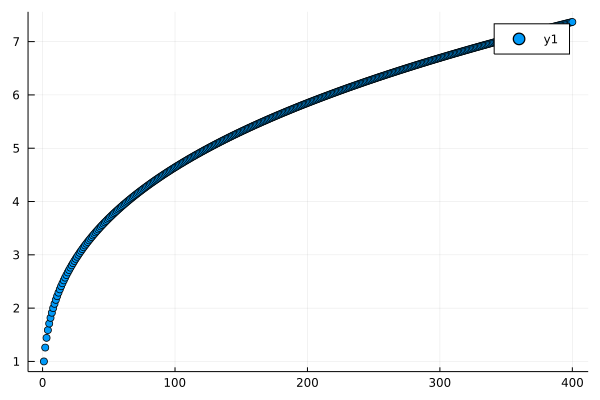

In [128]:
scatter(par,sol[2])

In [129]:
scatter(sol[3])